## AutoCorrelation Function and Partial AutoCorrelation Function

2 useful plots


AutoCorrelation Plot shows the correlation of the series with itself , lagged by x time units<br>
So the y axis is the correlation and the x axis is the number of time units of lag


These ACF and PACF plots can help choose order parameters for ARIMA based models.<br>
Later we will see that it is usually much easier to perform a gird serach of the parameter values, rather than attempt to read those plots directly

**airline_passengers.csv & DailyTotalFemaleBirths.csv**

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import statsmodels.api as sm

In [2]:
#We will use these tools
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

#acovf--autocovariance

In [3]:
# Load a non-stationary dataset
df1 = pd.read_csv('Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

In [4]:
# Load a stationary dataset
df2 = pd.read_csv('Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [5]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
#AutoCorrelation Function (Simple example)
df = pd.DataFrame({'a':[13, 5, 11, 12, 9]})
df

,a
0,13
1,5
2,11
3,12
4,9


In [7]:
arr = acf(df['a'])
arr

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [8]:
#Partial AutoCorrelation
arr4 = pacf_yw(df['a'],nlags=4,method='mle')
arr4

#nlags=4 as there are 5 values in a columns

#We passed in method='mle' above in order to use biased ACF coefficients. "mle" stands for "maximum likelihood estimation".
#Alternatively we can pass method='unbiased' (the statsmodels default):

#yw---Yule-Walker

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [9]:
arr5 = pacf_yw(df['a'],nlags=4,method='unbiased') #unbiased method
arr5

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [10]:
#Partial AutoCorrelation Function with ordinary Least squares
#This provides partial autocorrelations with ordinary least squares (OLS) estimates for each lag instead of Yule-Walker.
arr6 = pacf_ols(df['a'],nlags=4)
arr6

#Different methods to calculate pacf because to calculate correlation there are different methods

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

### Plotting
The arrays returned by <tt>.acf(df)</tt> and <tt>.pacf_yw(df)</tt> show the magnitude of the autocorrelation for a given $y$ at time $t$. Before we look at plotting arrays, let's look at the data itself for evidence of autocorrelation.

Pandas has a built-in plotting function that plots increasing $y_t$ values on the horizontal axis against lagged versions of the values $y_{t+1}$ on the vertical axis. If a dataset is non-stationary with an upward trend, then neighboring values should trend in the same way.

In [11]:
from pandas.plotting import lag_plot

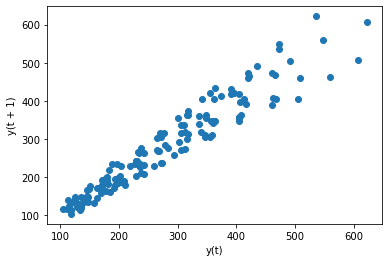

In [12]:
#Airline Passengers
lag_plot(df1['Thousands of Passengers']);

#evidence of a very strong autocorrelation

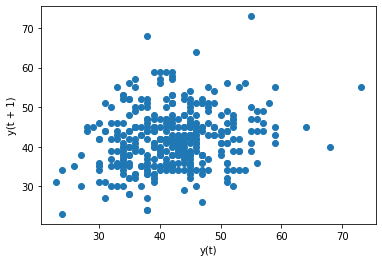

In [13]:
#Daily total female births
lag_plot(df2['Births']);

#there is little evidence of autocorrelation here
#its obvious as there can't be like total no. of birth of child is increasing as compared to the previous one

### ACF Plots
Plotting the magnitude of the autocorrelations over the first few (20-40) lags can say a lot about a time series.

ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [15]:
#Daily total female birth

# Let's look first at the ACF array. By default acf() returns 40 lags
acf(df2['Births'])

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825,  0.0650489 ,  0.11466565,  0.1552232 ,  0.12850638,
        0.10358981,  0.09734643,  0.04912286,  0.04022798,  0.05838555,
        0.05359812,  0.10151053,  0.08268663,  0.0912185 ,  0.11192192,
        0.05652846])

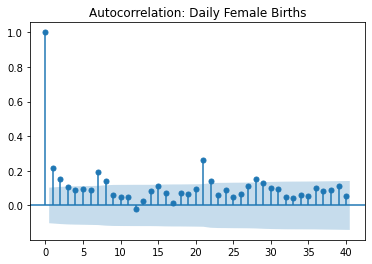

In [16]:
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation: Daily Female Births'
lags = 40
plot_acf(df2,title=title,lags=lags);

In [17]:
#Airline Passengers

acf(df1['Thousands of Passengers'])

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

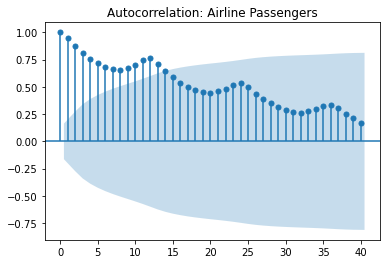

In [18]:
title = 'Autocorrelation: Airline Passengers'
lags = 40
plot_acf(df1,title=title,lags=lags);

### PACF Plots

Works best with stationary data

PACF only describes the direct relationship between an observation and its lag

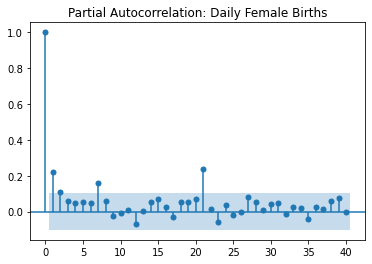

In [19]:
#stationary data

#daily total female births
title='Partial Autocorrelation: Daily Female Births'
lags=40
plot_pacf(df2,title=title,lags=lags);


# Non stationary data to be converted to stationary by differencing

Its quite hard to read these plots, instead use Grid Search